In [36]:
#importing files
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from fbprophet import Prophet

In [37]:
#reading dataset
headers = ['col1','col2','col3','date','landavgtemp','landavgtempuncertainity','lanmaxtemp','lanmaxtempuncertainity','landoceanavgtemp','landoceanavgtempuncertainity']
dtypes = {'col1':'str','col2':'str','col3':'str','date':'date','landavgtemp':'float','landavgtempuncertainity':'float','lanmaxtemp':'float','lanmaxtempuncertainity':'float',
          'landoceanavgtemp':'float','landoceanavgtempuncertainity':'float'}
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Surface Temperature Data.csv")


In [38]:
#vieweing the top 5 rows within the dataframe
dataset.head(5)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Date,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750,1.0,1.0,1/1/1750,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2.0,1.0,2/1/1750,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3.0,1.0,3/1/1750,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4.0,1.0,4/1/1750,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5.0,1.0,5/1/1750,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#dropping columns that are not essential 
dataset.drop(columns  = ['Unnamed: 0','Unnamed: 1','Unnamed: 2','LandAverageTemperatureUncertainty','LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty',
                         'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'], inplace = True)

In [40]:
#final dataset after removing extra columns

dataset=dataset.rename(columns={'Date':'ds', 'LandAverageTemperature':'y'})
dataset.head(5)

,ds,y
0,1/1/1750,3.034
1,2/1/1750,3.083
2,3/1/1750,5.626
3,4/1/1750,8.490
4,5/1/1750,11.573


In [41]:
train = dataset.iloc[:3132,:]
test = dataset.iloc[3132:,:]

In [42]:
#Forecasting using fbprophet

pred = Prophet()
pred.fit(train)
#predict the next n number of years, substitute n in periods, frequency is yearly
future = pred.make_future_dataframe(periods=301, freq = 'M')
forecast = pred.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1750-01-01,1.883832,0.826282,3.031614
1,1750-02-01,2.905395,1.898043,3.972740
2,1750-03-01,4.515473,3.515805,5.496742
3,1750-04-01,7.993828,6.962619,9.030470
4,1750-05-01,10.853215,9.774177,11.936137
...,...,...,...,...
3428,2035-08-31,13.378666,12.434671,14.461245
3429,2035-09-30,10.914316,9.827496,11.938571
3430,2035-10-31,7.026135,5.938395,8.056302
3431,2035-11-30,4.858073,3.696685,5.960164


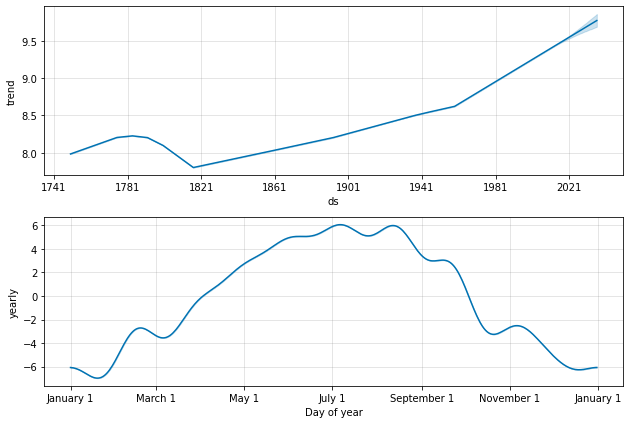

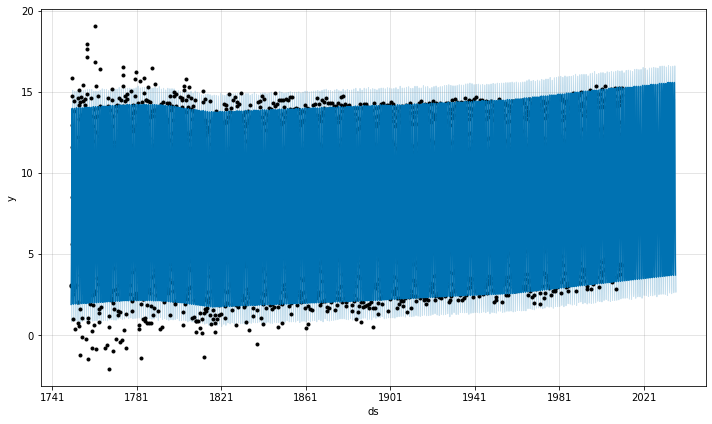

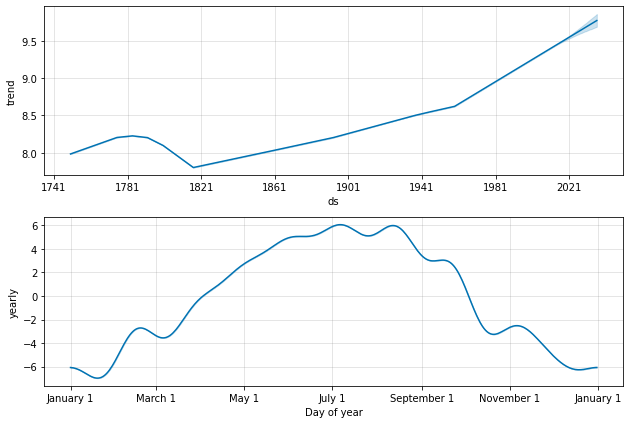

In [44]:
#plotting the forecast and the forecast components
pred.plot(forecast)
pred.plot_components(forecast)

In [45]:
#saving the data
forecast.to_csv("/content/drive/MyDrive/Colab Notebooks/Prophet for Surface Temp-Monthly.csv")

In [46]:
forecast_sub  = forecast[['ds','yhat']]
forecast_sub['ds'] = pd.to_datetime(forecast_sub['ds'])
test = test[['ds','y']]
test['ds'] = pd.to_datetime(test['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
test['month'] = test['ds'].dt.to_period('M')
forecast_sub['month'] = forecast_sub['ds'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
eval = test.merge(forecast_sub, on=['month'], how='left')
eval.head()

,ds_x,y,month,ds_y,yhat
0,2011-01-01,3.282,2011-01,2011-01-31,3.592878
1,2011-02-01,3.743,2011-02,2011-02-28,6.149816
2,2011-03-01,6.101,2011-03,2011-03-31,9.052916
3,2011-04-01,9.483,2011-04,2011-04-30,12.000417
4,2011-05-01,11.986,2011-05,2011-05-31,14.288444


In [49]:
eval['abs_err'] = abs(eval['yhat'] - eval['y'])
eval.head()

,ds_x,y,month,ds_y,yhat,abs_err
0,2011-01-01,3.282,2011-01,2011-01-31,3.592878,0.310878
1,2011-02-01,3.743,2011-02,2011-02-28,6.149816,2.406816
2,2011-03-01,6.101,2011-03,2011-03-31,9.052916,2.951916
3,2011-04-01,9.483,2011-04,2011-04-30,12.000417,2.517417
4,2011-05-01,11.986,2011-05,2011-05-31,14.288444,2.302444


In [50]:
total_y = sum(eval['y'])
total_error = sum(eval['abs_err'])
accuracy = 1 - (total_error/total_y)
print(accuracy)

0.799273888278378
